---
title: "Specification Curve"
jupyter: python3
bibliography: biblio.bib
---

Specification Curve is a Python package that performs specification curve analysis; it helps with the problem of the "garden of forking paths" (many defensible choices) when doing analysis by running many regressions and summarising the effects in an easy to digest chart.

[![PyPI](https://img.shields.io/pypi/v/specification_curve.svg)](https://pypi.org/project/specification_curve/)
[![Status](https://img.shields.io/pypi/status/specification_curve.svg)](https://pypi.org/project/specification_curve/)
[![Python Version](https://img.shields.io/pypi/pyversions/specification_curve)](https://pypi.org/project/specification_curve)
[![License](https://img.shields.io/pypi/l/specification_curve)](https://opensource.org/licenses/MIT)
[![Tests](https://github.com/aeturrell/specification_curve/workflows/Tests/badge.svg)](https://github.com/aeturrell/specification_curve/actions?workflow=Tests)
[![Codecov](https://codecov.io/gh/aeturrell/specification_curve/branch/main/graph/badge.svg)](https://codecov.io/gh/aeturrell/specification_curve)
[![pre-commit](https://img.shields.io/badge/pre--commit-enabled-brightgreen?logo=pre-commit&logoColor=white)](https://github.com/pre-commit/pre-commit)
[![Google Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/gist/aeturrell/438fb066e4471312667268669cef2c11/specification_curve-examples.ipynb)
[![DOI](https://zenodo.org/badge/282989537.svg)](https://zenodo.org/badge/latestdoi/282989537)
[![Downloads](https://static.pepy.tech/badge/specification-curve)](https://pepy.tech/project/Specification_curve)
![Linux](https://img.shields.io/badge/Linux-FCC624?style=for-the-badge&logo=linux&logoColor=black)
![macOS](https://img.shields.io/badge/mac%20os-000000?style=for-the-badge&logo=macos&logoColor=F0F0F0)
![Windows](https://img.shields.io/badge/Windows-0078D6?style=for-the-badge&logo=windows&logoColor=white)
[![Source](https://img.shields.io/badge/source%20code-github-lightgrey?style=for-the-badge)](https://github.com/aeturrell/specification_curve)

## Introduction

When specifying a causal model, modellers have a number of options. These can be informed by field intelligence, priors, and even misguided attempts to find a significant result. Even with the best of intentions, research teams can reach entirely different conclusions using the same, or similar, data because of different choices made in preparing data or in modelling it.

Typically this happens when there isn’t a clear way to do "feature engineering" on the data or the data are imperfect in some way. For example, you have a high frequency time series which needs to be aggregated to a lower frequency: you could take the maximum, the minimum, or the average over each high frequency time period. A different choice may be appropriate in different settings.

There's formal evidence that researchers really do make different decisions; one study [@silberzahn2018many] gave the same research question---whether soccer referees are more likely to give red cards to players with dark skin tones than to players with light skin tones---to 29 different teams. From the abstract of that paper:

> Analytic approaches varied widely across the teams, and the estimated effect sizes ranged from 0.89 to 2.93 (Mdn = 1.31) in odds-ratio units. Twenty teams (69%) found a statistically significant positive effect, and 9 teams (31%) did not observe a significant relationship. Overall, the 29 different analyses used 21 unique combinations of covariates. Neither analysts’ prior beliefs about the effect of interest nor their level of expertise readily explained the variation in the outcomes of the analyses. Peer ratings of the quality of the analyses also did not account for the variability.

So not only can different decisions made, but there seems to be no clearly identifiable reason for them!

There have since been a number of papers that find similar conclusions [@huntington2021influence].

Specification curves have been invented [@simonsohn2020specification] as a way to better grasp the garden of forking paths that analysts face, and help them show how sensitive their results are to alternative specifications.

More than one piece of software [@masur2019specr] has appeared to help researchers and analysts use this technique: **specification curve** is one such package!

## Quickstart

You can try out specification curve right now in [Google Colab](https://colab.research.google.com/gist/aeturrell/438fb066e4471312667268669cef2c11/specification_curve-examples.ipynb).

Here's an example of using **Specification Curve**.

Fit complete


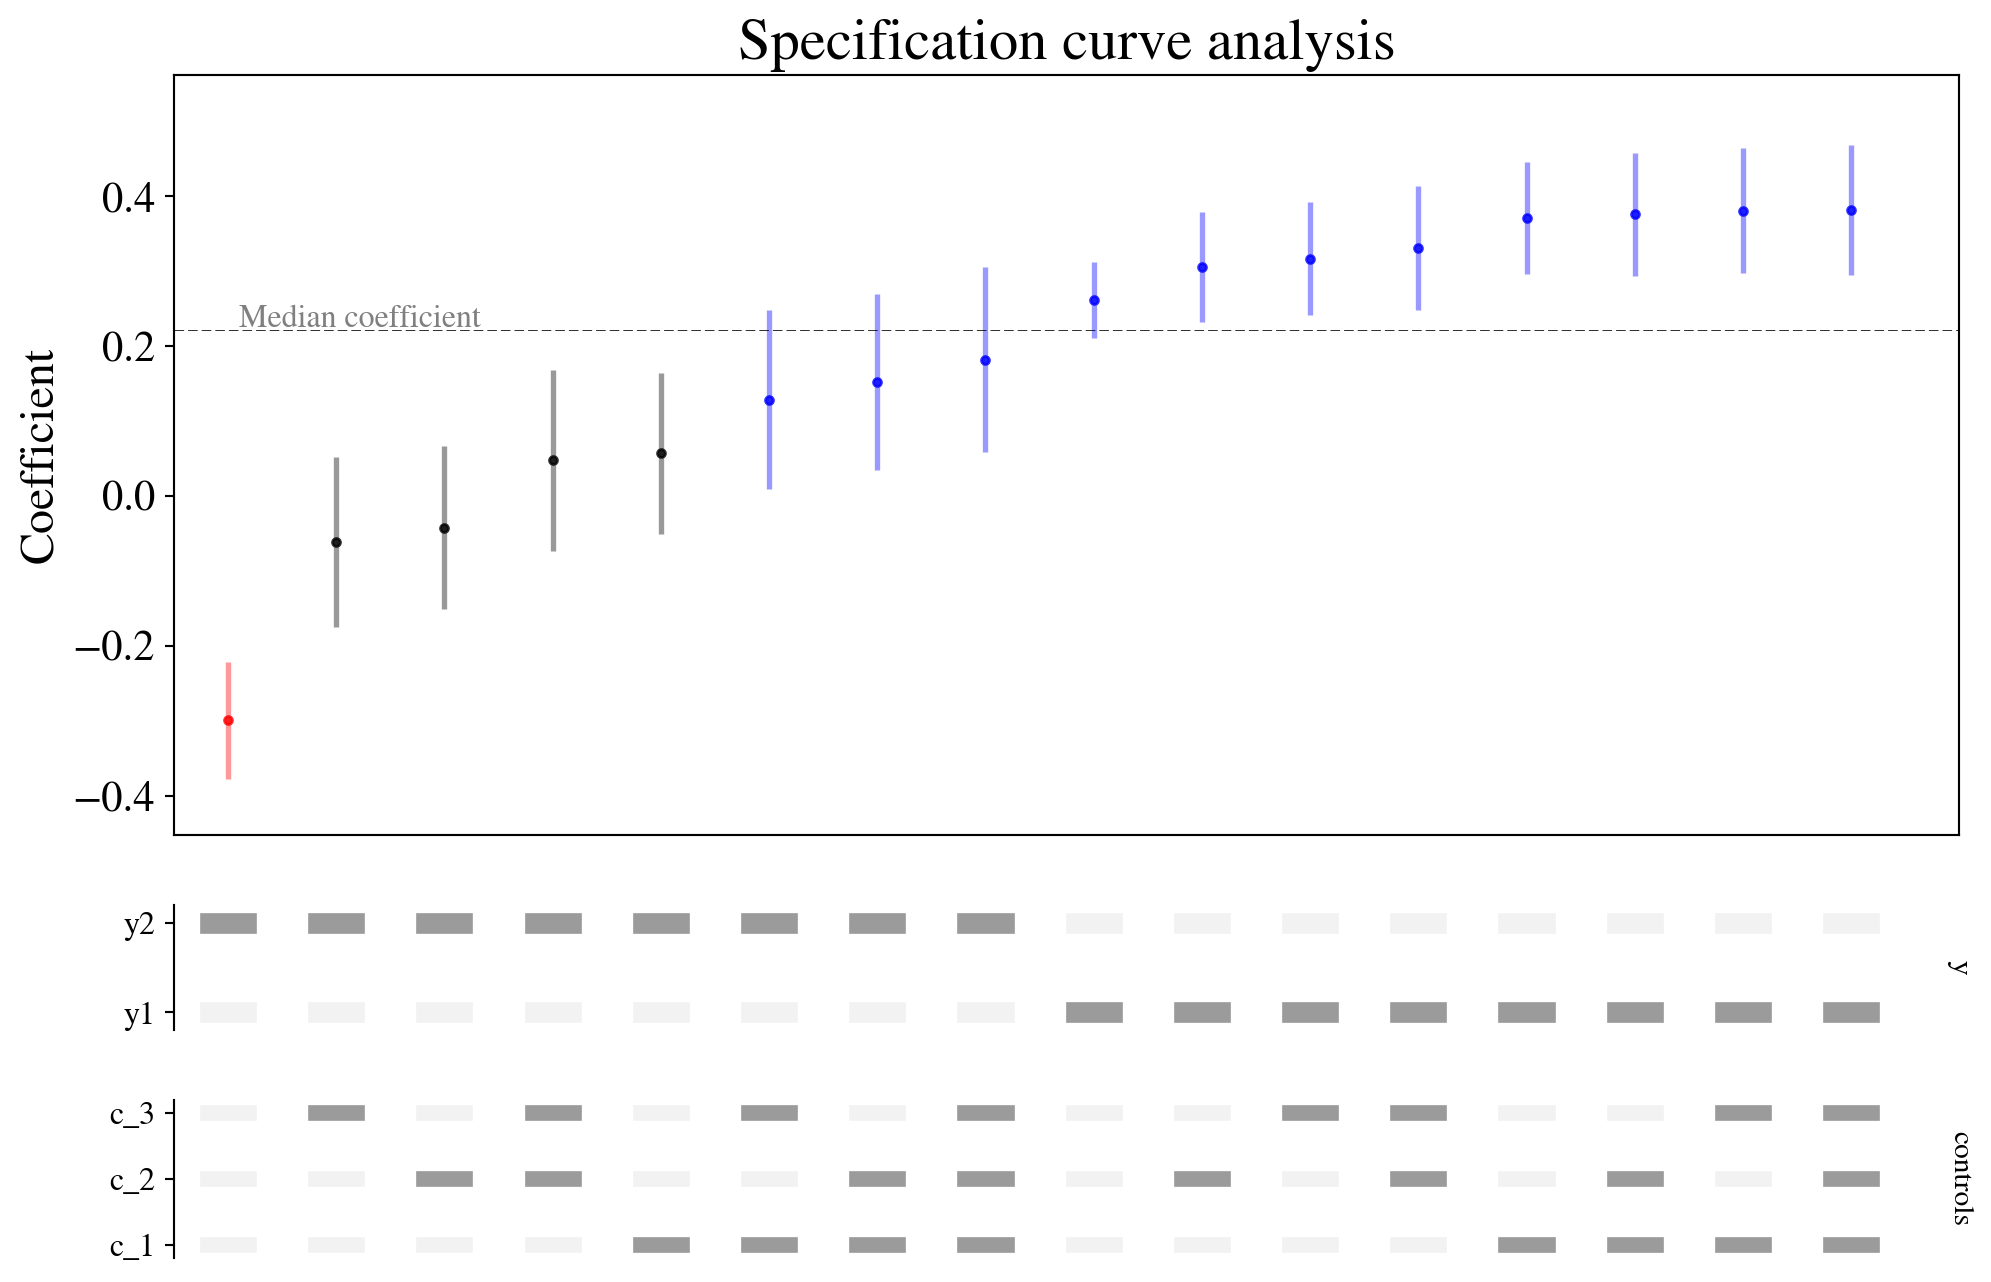

In [1]:
# import specification curve
# Generate some fake data
# ------------------------
import numpy as np
import pandas as pd
import specification_curve as specy

# Set seed for random numbers
seed_for_prng = 78557
# prng=probabilistic random number generator
prng = np.random.default_rng(seed_for_prng)
n_samples = 400
# Number of dimensions
n_dim = 4
c_rnd_vars = prng.random(size=(n_dim, n_samples))
y_1 = (
    0.4 * c_rnd_vars[0, :]  # THIS IS THE TRUE VALUE OF THE COEFFICIENT
    - 0.2 * c_rnd_vars[1, :]
    + 0.3 * prng.standard_normal(n_samples)
)
# Next line causes y_2 ests to be much more noisy
y_2 = y_1 - 0.5 * np.abs(prng.standard_normal(n_samples))
# Put data into dataframe
df = pd.DataFrame([y_1, y_2], ["y1", "y2"]).T
df["x_1"] = c_rnd_vars[0, :]
df["c_1"] = c_rnd_vars[1, :]
df["c_2"] = c_rnd_vars[2, :]
df["c_3"] = c_rnd_vars[3, :]

# Specification Curve Analysis
# -----------------------------
sc = specy.SpecificationCurve(
    df, y_endog=["y1", "y2"], x_exog="x_1", controls=["c_1", "c_2", "c_3"]
)
sc.fit()
sc.plot()

Grey squares (black lines when there are many specifications) show whether a variable is included in a specification or not. Blue or red markers and error bars show whether the coefficient is positive and significant (at the 0.05 level) or red and significant, respectively.

## Installation

You can install **Specification Curve** via pip:

```bash
$ pip install specification-curve
```

To install the development version from git, use:

```bash
$ pip install git+https://github.com/aeturrell/specification_curve.git
```

## Requirements

You can find a full list of requirements in the [pyproject.toml](https://github.com/aeturrell/skimpy/blob/main/pyproject.toml) file. The
main requirements are:

In [2]:
#| echo: false
from pathlib import Path
import toml

config = toml.load(Path("../pyproject.toml"))
dict_main_deps = config["tool"]["poetry"]["dependencies"]
for key, value in dict_main_deps.items():
    print(f"{key} {value}")

python >=3.9,<3.12
pandas ^2.0.3
statsmodels ^0.14.0
matplotlib ^3.6.1
types-setuptools >=67.6,<70.0
numpy ^1.26.4
typeguard ^4.2.1


## License

Distributed under the terms of the [MIT license](https://opensource.org/licenses/MIT).

## Citing Specification Curve

You can find full citation information at the following link: [https://zenodo.org/badge/latestdoi/282989537](https://zenodo.org/badge/latestdoi/282989537).

Using **Specification Curve** in your paper? Let us know by raising an issue beginning with "citation".

## Credits

The package is built with [poetry](https://python-poetry.org/), while the documentation is built with [Jupyter Book](https://jupyterbook.org). Tests are run with [nox](https://nox.thea.codes/en/stable/).

## Similar Packages

In RStats, there is [specr](https://github.com/masurp/specr) (which inspired many design choices in this package) and [spec_chart](https://github.com/ArielOrtizBobea/spec_chart). Some of the example data in this package is the same as in specr, but please note that results have not been cross-checked across packages.

## References

::: {#refs}
:::